In [127]:
import pandas as pd
import numpy as np

In [128]:
df = pd.read_csv("placement.csv")

In [129]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [130]:
df.shape

(100, 4)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [132]:
df = df.iloc[:,1:]

In [133]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [134]:
import matplotlib.pyplot as plt

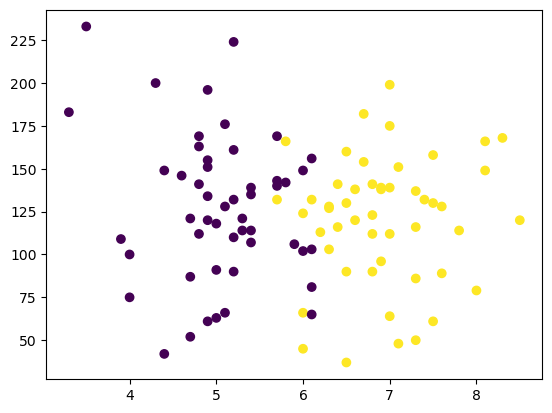

In [135]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [136]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [137]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [138]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [139]:
y.shape

(100,)

In [140]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [141]:
X_train

,cgpa,iq
12,5.4,139.0
38,6.5,160.0
13,6.4,116.0
21,7.1,151.0
76,4.9,155.0
...,...,...
1,5.9,106.0
15,5.1,176.0
24,4.7,121.0
83,7.5,130.0


In [142]:
y_train

12    0
38    1
13    1
21    1
76    0
     ..
1     0
15    0
24    0
83    1
92    0
Name: placement, Length: 90, dtype: int64

In [143]:
X_test

,cgpa,iq
19,5.2,132.0
51,4.8,141.0
93,6.8,112.0
33,6.0,149.0
49,5.4,135.0
65,8.1,166.0
9,5.1,66.0
91,7.5,158.0
10,6.0,45.0
82,6.5,37.0


In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()

In [146]:
X_train = scaler.fit_transform(X_train)

In [147]:
X_train

array([[-0.50034526,  0.36876298],
       [ 0.45776268,  0.90779006],
       [ 0.37066196, -0.22160002],
       [ 0.98036701,  0.67677845],
       [-0.93584886,  0.77945028],
       [-1.71975536, -0.63228733],
       [-0.50034526, -0.45261163],
       [-0.50034526, -0.27293594],
       [ 0.63196412,  0.75378232],
       [ 1.41587062,  0.08641545],
       [ 0.10935979, -1.1199785 ],
       [-0.6745467 ,  0.93345802],
       [ 0.10935979, -1.53066581],
       [ 0.28356124,  0.08641545],
       [ 0.02225907, -0.58095142],
       [ 0.63196412,  1.47248511],
       [-0.15194237,  0.44576685],
       [ 0.89326629,  1.29280941],
       [ 0.80616557, -0.73495916],
       [-0.84874814, -0.17026411],
       [-0.23904309,  0.39443093],
       [ 0.19646052, -0.29860389],
       [ 1.15456845, -0.99163872],
       [-0.23904309,  1.13880167],
       [ 0.45776268, -0.88896689],
       [ 0.10935979,  0.80511824],
       [-1.37135247, -2.12102881],
       [ 0.98036701, -1.96702107],
       [ 0.71906484,

In [148]:
X_test = scaler.transform(X_test)

In [149]:
X_test

array([[-0.6745467 ,  0.18908728],
       [-1.02294958,  0.42009889],
       [ 0.71906484, -0.32427185],
       [ 0.02225907,  0.62544254],
       [-0.50034526,  0.26609115],
       [ 1.85137422,  1.0617978 ],
       [-0.76164742, -1.50499785],
       [ 1.3287699 ,  0.85645415],
       [ 0.02225907, -2.04402494],
       [ 0.45776268, -2.24936859]])

In [150]:
from sklearn.linear_model import LogisticRegression

In [151]:
clf = LogisticRegression()

In [152]:
### model training
clf.fit(X_train,y_train)

LogisticRegression()

In [153]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1], dtype=int64)

In [154]:
y_test

19    0
51    0
93    1
33    0
49    0
65    1
9     0
91    1
10    1
82    1
Name: placement, dtype: int64

In [155]:
from sklearn.metrics import accuracy_score

In [156]:
accuracy_score(y_test,y_pred)

0.8

In [159]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

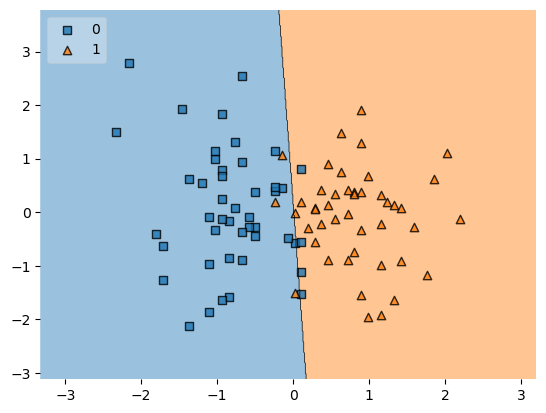

In [160]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [161]:
import pickle

In [163]:
pickle.dump(clf,open('model.pk1','wb'))